Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Loading Data

In [2]:
data = pd.read_csv('D:\\Medical_Cost.csv')

In [36]:
data.head(1339)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [38]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


Categorical Data

In [22]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [11]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex=le.transform (data.sex)

le.fit(data.smoker.drop_duplicates ())
data.smoker=le.transform (data.smoker)

le=LabelEncoder()
le.fit(data.region.drop_duplicates ())
data.region = le.transform (data.region)

In [39]:
data.head(1339)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Data Correlation

In [28]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

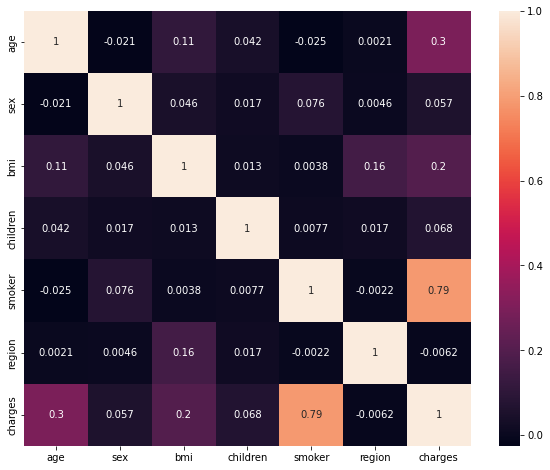

In [40]:
f, ax=plt.subplots(figsize=(10,8))
corr= data.corr()
sns.heatmap(corr, ax = ax, annot = True)

Smoker Analysis

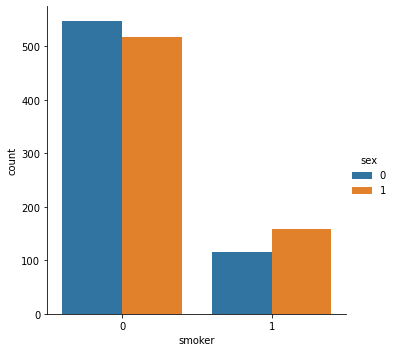

In [42]:
sns.catplot(x='smoker',kind='count',hue='sex',data=data)

BMI Analysis

C:\Users\rudra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


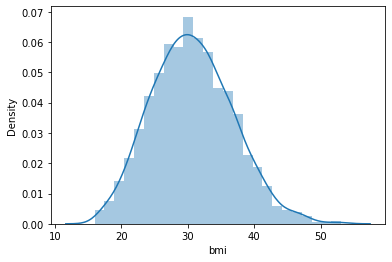

In [45]:
ax=sns.distplot(data["bmi"])

Children Count Analysis

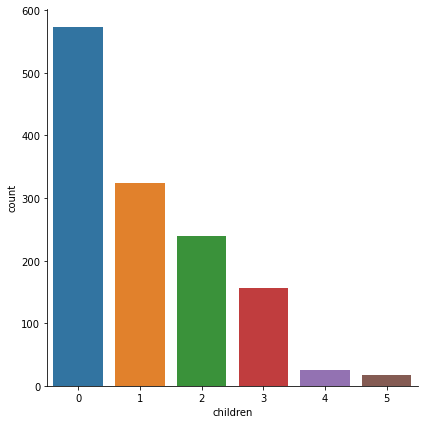

In [48]:
sns.catplot(x="children",kind="count",data=data,height=6)

In [50]:
data.head(1339)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Splitting Data

In [59]:
x=data.drop(data.columns[[6,5]],axis=1)
y=data['charges']

In [60]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [68]:
#splitting into testing and training data
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.30 , random_state = 0)

Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler ()
xtrain = sc_x.fit_transform (xtrain)
xtest = sc_x.fit_transform (xtest)

In [71]:
xtrain[0:2]

array([[0.        , 0.        , 0.32970137, 0.        , 0.        ],
       [0.45652174, 0.        , 0.45305354, 0.        , 0.        ]])

ML Models

In [72]:
linear = LinearRegression()
dt = DecisionTreeRegressor()
svr=svm.SVR()
rf=RandomForestRegressor()

Training

In [73]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [74]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [75]:
svr.fit(xtrain,ytrain)

SVR()

In [76]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

Prediction

In [77]:
y_pred_linear = linear.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_rf = rf.predict(xtest)

RMSE Error

In [80]:
import math
error_linear = math.sqrt (mean_squared_error ((y_pred_linear), ytest))
error_dt = math.sqrt (mean_squared_error (y_pred_dt, ytest))
error_svr = math.sqrt (mean_squared_error (y_pred_svr, ytest))
error_rf = math.sqrt (mean_squared_error (y_pred_rf, ytest))

In [81]:
print ("Model                :       RMSE Error\n")
print ("Linear Regression    :      ",error_linear)
print ("Decision Tree        :      ",error_dt)
print ("Support Vector       :      ",error_svr)
print ("Random Forest        :      ",error_rf)

Model                :       RMSE Error

Linear Regression    :       5827.6103488260305
Decision Tree        :       7007.542132055359
Support Vector       :       13132.937356154958
Random Forest        :       5203.878099621202
